# Extra Credit
## Project option 1 - Drug annotation of 23andme report


Columns in the **23andme_v5_hg19_ref.txt** file are:
- CHR: the chromosome number
- POS: the position of the variant - position where the difference in nucleotides is found
- dbSNP_ID: the variant identifier in the dbSNP database (https://www.ncbi.nlm.nih.gov/snp/) (this field will contain a dot . when the SNP is not available in the dbSNP database)
- **ALLELE_23andme** : ALLELE: the nucleotides found at that position on the pair of chromosomes


Columns in the **var_drug_ann.tsv** file are:
- Variant Annotation ID: unique ID number for each variant/drug annotation    
- **dbSNP ID** : Variant/Haplotypes: dbSNP ID or haplotype(s)
- **GENE_SYMBOL** : Gene: HGNC symbol
- **DRUG_NAME** : Drug(s): Drug name
- **PMID** : PubMed identifier
- **PHENOTYPE_CATEGOERY**: Phenotype Category: options [efficacy, toxicity, dosage, metabolism/PK other]
- **SIGNIFICANCE**: Significance: yes or no – determined by if the author stated the association was significant
- **NOTES** :Notes: curator notes field
- **SENTENCE**: Sentence: structured sentence
- **ALLELE_PharmGKB**: Alleles: variant alleles in annotation
- Specialty Population: tags for any special populations this annotation is relevant to (e.g. pediatric)

And other columns: Metabolizer types, isPlural, Is/Is Not associated, Direction of effect, PD/PK terms, Multiple drugs And/or, Population types, Population Phenotypes or diseases, Multiple phenotypes or diseases And/or, Comparison Allele(s) or Genotype(s), Comparison Metabolizer types

## Q&A
**What was your biggest challenge in this project? (regarding writing code and not only)**
merging the data was hard. I wasn't sure if changing the names of the original dataframes was what I was supposed to do or not. I ended up getting a lot of NaN values when I first merged the two dataframes. It took me a while to figure out that the argument I provided to merge on 'dbSNP_ID' was incorrect. I initially included a 'how' argument but realized that wasn't necessary.

**What did you learn while working on this project? (regarding writing code and not only)**
plotting the histogram was confusing. I had to uderstand what a histogram was. I initially thought the xaxis would have the gene names. 
I also learned what changing some of the default arguments in seaborn.histplot() meant such as bin#. 

**If you had more time on the project what other question(s) would you like to answer? (at least one question is required)**
I would like to look into which drugs are associated with which phenotypes or diseases and how these are related to various gene symbols. 

### Q1. Map/merge the 23andme file and the variant-drug annotation file based on dbSNP_ID (also known as rsID).

The merged result should have the following columns:

dbSNP_ID, GENE_SYMBOL, DRUG_NAME, PMID, PHENOTYPE_CATEGORY, SIGNIFICANCE, NOTES, SENTENCE, ALLELE_PharmGKB (variant alleles in annotation), ALLELE_23andme (variant alleles in 23andme file)

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# loading the 23andme data into a dataframe
twentythree_df = pd.read_csv('23andme_v5_hg19_ref.txt', sep='\t', comment='#', header=None, names=['CHR', 'POS', 'dbSNP_ID', 'ALLELE_23andme']).dropna()
twentythree_df.head(2)

,CHR,POS,dbSNP_ID,ALLELE_23andme
0,chr1,69869,rs548049170,T
1,chr1,74792,rs13328684,G


In [6]:
# loading the var_drug data into a dataframe
# rouge line was taken out in vim manually
drug_df = pd.read_csv('var_drug_ann.tsv', sep='\t', comment='#')
drug_df.head(2)

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,...,isPlural,Is/Is Not associated,Direction of effect,PD/PK terms,Multiple drugs And/or,Population types,Population Phenotypes or diseases,Multiple phenotypes or diseases And/or,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
0,1451834452,"CYP3A4*1, CYP3A4*17",CYP3A4,nifedipine,15634941,"Other, Metabolism/PK",not stated,in vitro expression of the recombinant CYP3A4*...,CYP3A4 *17 is associated with decreased metabo...,*17,...,Is,Associated with,decreased,metabolism of,NaN,NaN,NaN,NaN,*1,NaN
1,1451159680,rs5031016,CYP2A6,warfarin,22248286,Dosage,no,No association was found between this variant ...,Allele G is not associated with increased dose...,G,...,Is,Not associated with,increased,dose of,NaN,in people with,Other:an international normalized ratio (INR) ...,NaN,A,NaN


In [7]:
# renaming relavant column names
col_name_change = {'Variant/Haplotypes': 'dbSNP_ID',
                  'Gene': 'GENE_SYMBOL',
                  'Drug(s)': 'DRUG_NAME',
                  'Phenotype Category': 'PHENOTYPE_CATEGORY',
                  'Significance': 'SIGNIFICANCE',
                  'Notes': 'NOTES',
                  'Sentence': 'SENTENCE',
                  'Alleles': 'ALLELE_PharmGKB'}

drug_df.rename(columns=col_name_change, inplace=True)
drug_df_subset = drug_df[['dbSNP_ID','GENE_SYMBOL', 'DRUG_NAME', 'PMID', 'PHENOTYPE_CATEGORY', 'SIGNIFICANCE', 'NOTES', 'SENTENCE', 'ALLELE_PharmGKB']]
drug_df_subset

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB
0,"CYP3A4*1, CYP3A4*17",CYP3A4,nifedipine,15634941,"Other, Metabolism/PK",not stated,in vitro expression of the recombinant CYP3A4*...,CYP3A4 *17 is associated with decreased metabo...,*17
1,rs5031016,CYP2A6,warfarin,22248286,Dosage,no,No association was found between this variant ...,Allele G is not associated with increased dose...,G
2,CYP2D6 ultrarapid metabolizer genotype,CYP2D6,tramadol,18204346,Metabolism/PK,yes,"Median (+)R,R-tramadol area under the curve wa...",CYP2D6 ultra-metabolizer genotype is associate...,NaN
3,CYP2C9*11,CYP2C9,warfarin,33350885,Dosage,not stated,"""This case suggests that CYP2C9 *11/*11 carrie...",CYP2C9 *11/*11 is associated with decreased do...,*11/*11
4,"CYP2B6*1, CYP2B6*18",CYP2B6,efavirenz,16495778,Metabolism/PK,yes,Please note that in the paper the allele was r...,CYP2B6 *1/*18 is associated with increased con...,*1/*18
...,...,...,...,...,...,...,...,...,...
11597,rs2242480,CYP3A4,tacrolimus,38004558,Metabolism/PK,yes,"""CYP3A4*18B genotypes were also significant co...",Genotypes CT + TT is associated with increased...,CT + TT
11598,rs7590387,RAMP1,erenumab,34965002,Efficacy,no,"""RAMP1 rs7590387 was found to confer a lower p...",Allele G is associated with decreased clinical...,G
11599,rs17844444,PCDHB6,verapamil,33829662,Efficacy,yes,"""There are 3 highly significant SNPs (p‐value ...",Allele A is associated with decreased clinical...,A
11600,rs2230433,ITGAL,verapamil,33829662,Efficacy,yes,"""There are 3 highly significant SNPs (p‐value ...",Allele C is associated with increased clinical...,C


In [8]:
# merging and only taking necessary columns 
merged_df = pd.merge(twentythree_df, drug_df_subset, on='dbSNP_ID')
result_df = merged_df[['dbSNP_ID', 'GENE_SYMBOL', 'DRUG_NAME', 'PMID', 'PHENOTYPE_CATEGORY', 'SIGNIFICANCE', 'NOTES', 'SENTENCE', 'ALLELE_PharmGKB', 'ALLELE_23andme']]

result_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs11807862,PRDM16,"atorvastatin, hmg coa reductase inhibitors, si...",24096969,Efficacy,no,There could be strand confusion with this A/T ...,Genotype AA is associated with decreased respo...,AA,T
1,rs228729,PER3,lithium,21781277,Efficacy,no,NaN,Allele T is not associated with increased resp...,T,T
2,rs228642,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C,C
3,rs228666,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C,T
4,rs228697,PER3,lithium,21781277,Efficacy,no,NaN,Allele G is not associated with increased resp...,G,C
...,...,...,...,...,...,...,...,...,...,...
5664,rs3810651,GABRQ,botulinum toxin type a,31014225,Efficacy,no,No significant difference in allele frequency ...,Allele T is not associated with response to bo...,T,T
5665,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
5666,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A
5667,rs1734791,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


### Q2. Filter the output so that it only contains significant associations (SIGNIFICANCE is yes) for variants that affect the drug efficacy (`PHENOTYPE_CATEGORY` is `efficacy`).

In [9]:
filtered_df = result_df[(result_df['SIGNIFICANCE'] == 'yes') & (result_df['PHENOTYPE_CATEGORY'] == 'Efficacy')]
filtered_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
8,rs1801131,MTHFR,oxaliplatin,20385995,Efficacy,yes,Statistics given as trend for increased overal...,Genotypes GG + GT are associated with increase...,GG + GT,T
9,rs1801131,MTHFR,"Vitamin B-complex, Incl. Combinations",27035272,Efficacy,yes,Please note that allele has been complemented ...,Allele G is associated with increased response...,G,T
11,rs1801131,MTHFR,methotrexate,25618758,Efficacy,yes,Alleles given as C and A. Efficacy of treatmen...,Genotype GT is associated with decreased respo...,GT,T
14,rs1801131,MTHFR,methotrexate,23198157,Efficacy,yes,Patients with the GG genotype had better overa...,Genotype GG is associated with increased respo...,GG,T
15,rs1801131,MTHFR,methotrexate,24386571,Efficacy,yes,Patients with the TT genotype had significantl...,Genotype TT is associated with decreased respo...,TT,T
...,...,...,...,...,...,...,...,...,...,...
5660,rs502434,GRIA3,"Selective serotonin reuptake inhibitors, venla...",23394390,Efficacy,yes,Regression model looking at interaction betwee...,Genotype CC is associated with decreased respo...,CC,T
5663,rs3810651,GABRQ,venlafaxine,23394390,Efficacy,yes,Those with the AA/AT genotype are more likely ...,Genotypes AA + AT are associated with increase...,AA + AT,T
5665,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
5666,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


### Q3. Save the output of the filtering step in a tab-separated file (23andme_PharmGKB_map.tsv) with the following columns:
dbSNP_ID, GENE_SYMBOL, DRUG_NAME, NOTES, SENTENCE, ALLELE_PharmGKB, ALLELE_23andme

In [10]:
filtered_subset = filtered_df[['dbSNP_ID', 'GENE_SYMBOL', 'DRUG_NAME', 'NOTES', 'SENTENCE', 'ALLELE_PharmGKB', 'ALLELE_23andme']]
filtered_subset.to_csv('23andme_PharmGKB_map.tsv', sep='\t', index=False)

### Q4. Create a tab separated file (23andme_PharmGKB_summary.tsv) with summarized data with the following columns:
GENE_SYMBOL, DRUG_NAME, dbSNP_IDs (list of IDs separated by ";")

In [11]:
summary_tsv = filtered_df[['GENE_SYMBOL', 'DRUG_NAME', 'dbSNP_ID']]
summary_tsv.to_csv('23andme_PharmGKB_summary.tsv', sep='\t', index=False)

### Q5. Plot the distribution (histogram) of the number of drugs associated with a gene, and the number of SNPs for a gene.

In [14]:
# number of snps associated with each gene
gene_snp_counts = filtered_subset.groupby('GENE_SYMBOL')['dbSNP_ID'].nunique().reset_index()
gene_snp_counts

,GENE_SYMBOL,dbSNP_ID
0,ABCA1,2
1,ABCB1,4
2,ABCC1,6
3,ABCC2,2
4,ABCC4,2
...,...,...
410,XRCC3,1
411,XRCC4,1
412,ZNF432,1
413,ZNF697,1


/Users/ymanasa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ymanasa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ymanasa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ymanasa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

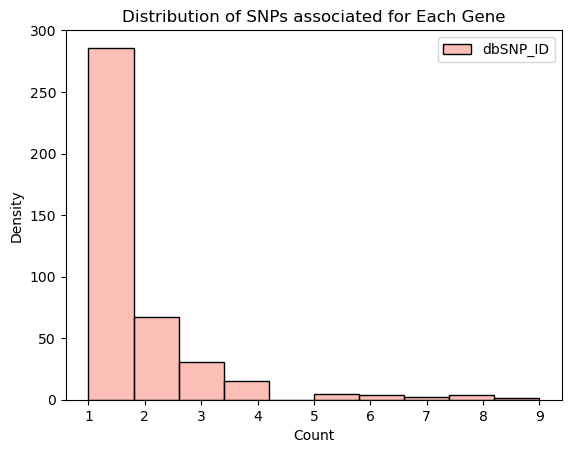

In [41]:
# plotting the histogram for snps associated with each gene
plt.figure()
sns.histplot(data=gene_snp_counts, bins=10, palette=['salmon'])
plt.title('Distribution of SNPs associated for Each Gene')
plt.xlabel('Count')
plt.ylabel('Density')

plt.show()

In [13]:
# number of drugs associated with each gene
gene_drug_counts = filtered_subset.groupby('GENE_SYMBOL')['DRUG_NAME'].nunique().reset_index()
gene_drug_counts

,GENE_SYMBOL,DRUG_NAME
0,ABCA1,2
1,ABCB1,16
2,ABCC1,2
3,ABCC2,8
4,ABCC4,2
...,...,...
410,XRCC3,2
411,XRCC4,1
412,ZNF432,1
413,ZNF697,1


/Users/ymanasa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ymanasa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ymanasa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ymanasa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

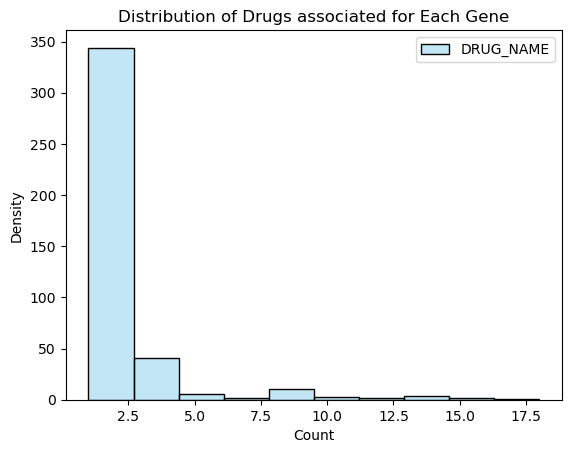

In [42]:
# plotting the histogram for drugs associated with each gene
plt.figure()
sns.histplot(data=gene_drug_counts, bins=10, palette=['skyblue'])
plt.title('Distribution of Drugs associated for Each Gene')
plt.xlabel('Count')
plt.ylabel('Density')

plt.show()